In [64]:
import multiresolutionimageinterface as mir
import matplotlib.pyplot as plt
import numpy as np

from skimage import filters, io
from skimage.color import rgb2gray
from tqdm import tqdm_notebook as tqdm

from os import path

import pandas as pd

In [2]:
import sys
sys.path.append('../../deep-histopath/')

In [3]:
from deephistopath.wsi import filter

In [4]:
reader = mir.MultiResolutionImageReader()

In [39]:
mr_image = reader.open('../inputs/tumor_001.tif')
mask = reader.open('../inputs/mask_001.tif')

In [33]:
mask.

5

In [7]:
x, y = mr_image.getLevelDimensions(0)
x = x // 256
y = y // 256

In [10]:
mr_image.getLevelDimensions(0)

(97792, 221184)

In [12]:
img = mr_image.getUCharPatch(0, 0, x , y, 8)

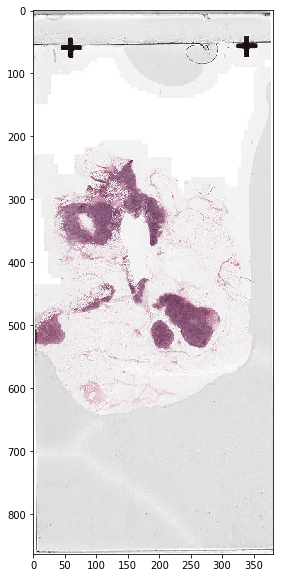

In [17]:
plt.figure(figsize=(5, 10))
plt.imshow(img)
plt.show()

In [18]:
filtered_img = rgb2gray(filter.apply_image_filters(img))

Mask percentage 90.74% >= overmask threshold 90.00% for Remove Green Channel green_thresh=200, so try 228
Filter Green Channel | Time: 0:00:00.001401  Type: bool    Shape: (864, 382)
Filter Green Channel | Time: 0:00:00.002951  Type: bool    Shape: (864, 382)
Mask RGB             | Time: 0:00:00.001394  Type: uint8   Shape: (864, 382, 3)
Filter Grays         | Time: 0:00:00.006653  Type: bool    Shape: (864, 382)
Mask RGB             | Time: 0:00:00.001102  Type: uint8   Shape: (864, 382, 3)
Filter Red Pen       | Time: 0:00:00.011420  Type: bool    Shape: (864, 382)
Mask RGB             | Time: 0:00:00.000948  Type: uint8   Shape: (864, 382, 3)
Filter Green Pen     | Time: 0:00:00.018028  Type: bool    Shape: (864, 382)
Mask RGB             | Time: 0:00:00.000861  Type: uint8   Shape: (864, 382, 3)
Filter Blue Pen      | Time: 0:00:00.015054  Type: bool    Shape: (864, 382)
Mask RGB             | Time: 0:00:00.001219  Type: uint8   Shape: (864, 382, 3)
Mask RGB             | Time: 0:0

In [72]:
mr_image.getLevelDimensions(0)

(97792, 221184)

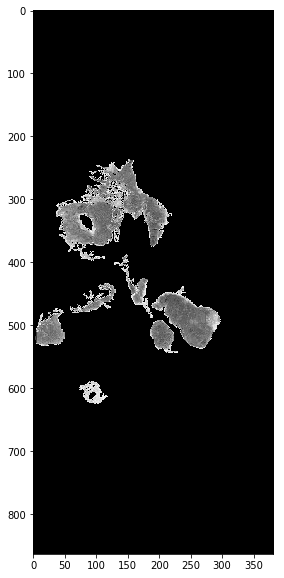

In [19]:
plt.figure(figsize=(5, 10))

plt.imshow(filtered_img, cmap='gray')

plt.show()

In [26]:
71924 / 256 

280.953125

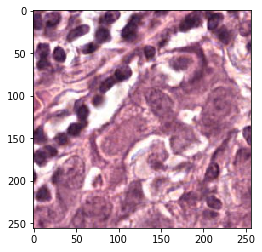

In [40]:
plt.imshow(np.squeeze(mr_image.getUCharPatch(71800, 131700, 256 , 256, 0)))

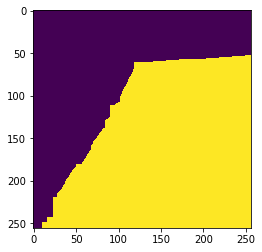

In [42]:
plt.imshow(np.squeeze(mask.getUCharPatch(71800, 131700, 256 , 256, 0)))

In [74]:
np.random.uniform(0, 1)

0.5931269456695368

In [76]:
patches = []
labels = []

patch_x = 256
patch_y = 256

neg_downsample = 0.01

for i in tqdm(range(0, x)):
    for j in range(0, y):
        if filtered_img[j, i] == 0:
            continue
        
        mask_patch = mask.getUCharPatch(i * 256, j * 256, 256, 256, 0)
        mr_patch = mr_image.getUCharPatch(i * 256, j * 256, 256, 256, 0)
        
        patch_name = "{}_{}_{}.png".format(0, i, j)
        mask_name = '{}_{}_{}.png'.format(0, i, j)
        
        #io.imsave(path.join('../inputs/mask_001', mask_name), np.squeeze(mask_patch))
        # io.imsave(path.join('../inputs/patch_001', patch_name), mr_patch)
        
        if np.sum(mask_patch) > 0.05 * (patch_x * patch_y):
            # patches.append(mr_patch)
            # patch_name = "../inputs/patch_001/{}_{}.png".format(i, j)
            # io.imsave(patch_name, mr_patch)
            io.imsave(path.join('../inputs/patch_001', patch_name), mr_patch)
            labels.append({'patch': patch_name, 'label': 1})
        else:
            # patches.append(mr_patch)
            rand = np.random.uniform(0.01)
            if (rand < neg_downsample):
                io.imsave(path.join('../inputs/patch_001', patch_name), mr_patch)
                labels.append({'patch': patch_name, 'label': 0})

In [78]:
label_df.to_csv('../inputs/tumor001_patches.csv', index=None)

In [63]:
len(labels)

25409

In [77]:
label_df = pd.DataFrame(labels)

In [69]:
len(label_df.loc[label_df['label'] == 1])

219

In [ ]:
pd.con

In [70]:
len(label_df) - 219

25190

In [21]:
mask_patch.shape

(256, 256, 1)

In [59]:
labels

[]

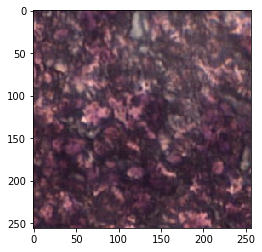

In [51]:
plt.imshow(patches[10])

In [55]:
np.sum(mask)

<multiresolutionimageinterface.MultiResolutionImage; proxy of <Swig Object of type 'std::shared_ptr< MultiResolutionImage > *' at 0x7f182eadeae0> >

In [34]:
filter.tissue_percent(patches[400])

99.5330810546875

In [122]:
np.sum(labels)

0

In [80]:
mr_l8_gray > otsu_thre

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [83]:
np.sum(mr_l8_gray > otsu_thre)

306409